# HK-2022 cross section dataset

## Data import and drop unnecessary rows

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None

hk_2022 = pd.read_csv('./Data/HK_2022.csv', dtype={'plz': object, 'kid2019': object})

df_original = pd.DataFrame(hk_2022)

df_original['adat_year'] = df_original['adat'].astype(str).str[:4]
df_original['adat_year'] = pd.to_numeric(df_original['adat_year'])

number_of_transactions_per_year = df_original.groupby('adat_year')['price_sqm'].count()
print(number_of_transactions_per_year)

object_features = [ 'ausstattung', 'denkmalobjekt', 'einbaukueche', 'ferienhaus', 'gaestewc', 'garten', 'haustier_erlaubt', 'kategorie_Haus']
general_object_information = ['bauphase', 'einliegerwohnung', 'foerderung', 'immobilientyp', 'kaufvermietet', 'mieteinnahmenpromonat', 'nebenraeume', 'rollstuhlgerecht']
area_information = ['nutzflaeche']
energy_and_structure_information = ['energieausweistyp', 'ev_kennwert', 'ev_wwenthalten', 'heizkosten', 'heizungsart', 'letzte_modernisierung']
price_information = ['parkplatzpreis']
regional_information = ['gid2019', 'kid2019', 'ergg_1km', 'blid']
meta_information_advertisement = ['click_customer', 'click_schnellkontakte', 'click_url', 'click_weitersagen', 'hits', 'laufzeittage', 'hits_gen']
technical_variables = ['bef1', 'bef2', 'bef3', 'bef4', 'bef5', 'bef6', 'bef7', 'bef8', 'bef9', 'bef10', 'anbieter', 'duplicateid', 'click_schnellkontakte_gen', 'click_weitersagen_gen', 'click_url_gen']
other_variables = ['liste_show', 'liste_match', 'liste_show_gen', 'liste_match_gen']
columns_to_drop = object_features + general_object_information + area_information + energy_and_structure_information + price_information + regional_information + meta_information_advertisement + technical_variables + other_variables
df_original.drop(columns=columns_to_drop, axis=1, inplace=True)

df = df_original[df_original['adat_year'] == 2022]

print(df.shape)
df.head()

adat_year
2020      2830
2021     22073
2022    234444
Name: price_sqm, dtype: int64
(234444, 16)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,parkplatz,energieeffizienzklasse,objektzustand,adat,price_sqm,adat_year
1,132220614,7639,980000.0,NaN,180.0,700,6,4,3,No,Yes,Not specified,Well kempt,2022m9,5444.4443,2022
2,131746727,67480,572000.0,NaN,246.0,860,8,6,2,No,Yes,Not specified,Well kempt,2022m2,2325.2034,2022
3,133856230,Other missing,275000.0,NaN,187.0,1000,5,4,2,No,Other missing,Not specified,Not specified,2022m5,1470.5883,2022
4,131486960,57550,349000.0,2008.0,165.0,920,5,3,1,No,Yes,Not specified,Like new,2022m1,2115.1516,2022
5,133721583,Other missing,399000.0,NaN,298.0,1911,8,Other missing,Other missing,Yes,Other missing,Not specified,Modernised,2022m5,1338.9261,2022


## Cleaning of characteristics

In [121]:
#df_original = df_hk_cities.copy(deep=True)

df_characteristics = df[df['baujahr'].notna()]
df_characteristics['age'] = df_characteristics['adat_year'] - df_characteristics['baujahr']

df_characteristics = df_characteristics[df_characteristics['zimmeranzahl'].notna()]
df_characteristics = df_characteristics[~df_characteristics['zimmeranzahl'].str.contains("Implausible value")]
df_characteristics['zimmeranzahl'] = pd.to_numeric(df_characteristics['zimmeranzahl'])
df_characteristics = df_characteristics[(df_characteristics['zimmeranzahl'] > 0) & (df_characteristics['zimmeranzahl'] < 30)]


df_characteristics = df_characteristics[df_characteristics['schlafzimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Implausible value")]
df_characteristics['schlafzimmer'] = pd.to_numeric(df_characteristics['schlafzimmer'])
df_characteristics = df_characteristics[(df_characteristics['schlafzimmer'] > 0) & (df_characteristics['schlafzimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['badezimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Implausible value")]
df_characteristics['badezimmer'] = pd.to_numeric(df_characteristics['badezimmer'])
df_characteristics = df_characteristics[(df_characteristics['badezimmer'] > 0) & (df_characteristics['badezimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['wohnflaeche'].notna()]
df_characteristics['wohnflaeche'] = pd.to_numeric(df_characteristics['wohnflaeche'])
df_characteristics = df_characteristics[(df_characteristics['wohnflaeche'] > 0) & (df_characteristics['wohnflaeche'] < 5000)]

df_characteristics = df_characteristics[df_characteristics['grundstuecksflaeche'].notna()]
df_characteristics = df_characteristics[~df_characteristics['grundstuecksflaeche'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['grundstuecksflaeche'].str.contains("Implausible value")]
df_characteristics['grundstuecksflaeche'] = pd.to_numeric(df_characteristics['grundstuecksflaeche'])
df_characteristics = df_characteristics[(df_characteristics['grundstuecksflaeche'] > 0) & (df_characteristics['grundstuecksflaeche'] < 5000)]

df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("Not specified")]
df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("By arrangement")]
#df_characteristics['objektzustand'] = df_characteristics['objektzustand'].astype('category')
#df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.reorder_categories(['Dilapidated', 'Needs renovation', 'Well kempt', 'Modernised', 'Reconstructed', 'Completely renovated', 'Like new', 'First occupancy after reconstruction', 'First occupancy'], ordered=True)
#df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.codes
df_characteristics = df_characteristics.replace(['Needs renovation', 'Well kempt', 'Completely renovated', 'Like new', 'First occupancy after reconstruction', 'First occupancy'], ['Needs_renovation', 'Well_kempt', 'Completely_renovated', 'Like_new', 'First_occupancy_after_reconstruction', 'First_occupancy'])
df_characteristics = pd.get_dummies(df_characteristics, columns=['objektzustand'], prefix=['Objektzustand'])

df_characteristics = df_characteristics[~df_characteristics['parkplatz'].str.contains("Other missing")]
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].astype('category')
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].cat.codes

df_characteristics = df_characteristics[~df_characteristics['keller'].str.contains("Other missing")]
df_characteristics['keller'] = df_characteristics['keller'].astype('category')
df_characteristics['keller'] = df_characteristics['keller'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df_characteristics['keller'] = df_characteristics['keller'].cat.codes

df_characteristics = df_characteristics[~df_characteristics['energieeffizienzklasse'].str.contains("Not specified")]
df_characteristics['energieeffizienzklasse'] = df_characteristics['energieeffizienzklasse'].astype('category')
df_characteristics['energieeffizienzklasse'] = df_characteristics['energieeffizienzklasse'].cat.reorder_categories(['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'APLUS'], ordered=True)
df_characteristics['energieeffizienzklasse'] = df_characteristics['energieeffizienzklasse'].cat.codes

print(df_characteristics.shape)
df_characteristics.head()

(13741, 25)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,...,age,Objektzustand_Completely_renovated,Objektzustand_Dilapidated,Objektzustand_First_occupancy,Objektzustand_First_occupancy_after_reconstruction,Objektzustand_Like_new,Objektzustand_Modernised,Objektzustand_Needs_renovation,Objektzustand_Reconstructed,Objektzustand_Well_kempt
17,136564340,24943,1849990.0,2012.0,409.60,316.0,10.5,5,5,0,...,10.0,0,0,0,0,0,0,0,0,1
18,133289723,24943,560000.0,2006.0,124.98,504.0,4.5,3,2,0,...,16.0,0,0,0,0,0,1,0,0,0
29,133592175,24943,795000.0,2003.0,224.00,525.0,6.0,3,2,0,...,19.0,0,0,0,0,0,0,0,0,1
32,138463026,24943,899000.0,2016.0,202.00,742.0,6.0,5,2,0,...,6.0,0,0,0,0,1,0,0,0,0
33,138085654,24943,645000.0,1925.0,139.67,998.0,4.0,2,1,1,...,97.0,0,0,0,0,0,0,0,0,1


## Merge locational information

In [122]:
plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
df_plz_city = pd.DataFrame(plz_city)
df_plz_city.drop('osm_id', axis=1, inplace=True)
df_plz_city = df_plz_city.drop_duplicates(subset=['plz'])

df = pd.merge(df_characteristics, df_plz_city, how="left", on="plz", validate="m:1")
df = df[df['ort'].notna()]


#df = df.groupby('bundesland')['kaufpreis', 'price_sqm'].mean()
#print(df)


plz_einwohner_df = pd.read_csv('./Data/plz_einwohner.csv', sep=',', dtype={'plz': object, 'einwohner': int})
einwohner_bundesland_df = pd.merge(df_plz_city, plz_einwohner_df, how="left", on="plz")

einwohner_bundesland_df = einwohner_bundesland_df.groupby('bundesland')['einwohner'].sum()

df = pd.merge(df, einwohner_bundesland_df, how="left", on="bundesland")

print(df.shape)
df.head()

(13188, 30)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,...,Objektzustand_Like_new,Objektzustand_Modernised,Objektzustand_Needs_renovation,Objektzustand_Reconstructed,Objektzustand_Well_kempt,ags,ort,landkreis,bundesland,einwohner
0,136564340,24943,1849990.0,2012.0,409.60,316.0,10.5,5,5,0,...,0,0,0,0,1,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
1,133289723,24943,560000.0,2006.0,124.98,504.0,4.5,3,2,0,...,0,1,0,0,0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
2,133592175,24943,795000.0,2003.0,224.00,525.0,6.0,3,2,0,...,0,0,0,0,1,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
3,138463026,24943,899000.0,2016.0,202.00,742.0,6.0,5,2,0,...,1,0,0,0,0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
4,138085654,24943,645000.0,1925.0,139.67,998.0,4.0,2,1,1,...,0,0,0,0,1,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421


## Merge unemployment and income

In [123]:
unemployment_rate = pd.read_csv('./Data/Macroeconomic Data States/Unemployment-rate.csv')
df_unemployment_rate = pd.DataFrame(unemployment_rate)
df_unemployment_rate.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_unemployment_rate, how="inner", on="bundesland")

income = pd.read_csv('./Data/Macroeconomic Data States/Income.csv')
df_income = pd.DataFrame(income)
df_income.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_income, how="inner", on="bundesland")

print(df.shape)
df.head()

(13188, 32)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,...,Objektzustand_Needs_renovation,Objektzustand_Reconstructed,Objektzustand_Well_kempt,ags,ort,landkreis,bundesland,einwohner,Arbeitslosenquote,Einkommen
0,136564340,24943,1849990.0,2012.0,409.60,316.0,10.5,5,5,0,...,0,0,1,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
1,133289723,24943,560000.0,2006.0,124.98,504.0,4.5,3,2,0,...,0,0,0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
2,133592175,24943,795000.0,2003.0,224.00,525.0,6.0,3,2,0,...,0,0,1,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
3,138463026,24943,899000.0,2016.0,202.00,742.0,6.0,5,2,0,...,0,0,0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
4,138085654,24943,645000.0,1925.0,139.67,998.0,4.0,2,1,1,...,0,0,1,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820


## Merge population densisty, GDP per capita and inflation

In [124]:
population_density = pd.read_csv('./Data/Macroeconomic Data States/Population-density.csv')
df_population_density = pd.DataFrame(population_density)
df_population_density.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_population_density, how="inner", on="bundesland")

gdp_per_capita = pd.read_csv('./Data/Macroeconomic Data States/GDP-per-capita.csv')
df_gdp_per_capita = pd.DataFrame(gdp_per_capita)
df_gdp_per_capita.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_gdp_per_capita, how="inner", on="bundesland")

inflation = pd.read_csv('./Data/Macroeconomic Data States/Inflation.csv')
df_inflation = pd.DataFrame(inflation)
df_inflation.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_inflation, how="inner", on="bundesland")

print(df.shape)
df.head()

(13188, 35)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,...,ags,ort,landkreis,bundesland,einwohner,Arbeitslosenquote,Einkommen,Bevölkerungsdichte,BIP_pro_einwohner,Inflation
0,136564340,24943,1849990.0,2012.0,409.60,316.0,10.5,5,5,0,...,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2
1,133289723,24943,560000.0,2006.0,124.98,504.0,4.5,3,2,0,...,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2
2,133592175,24943,795000.0,2003.0,224.00,525.0,6.0,3,2,0,...,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2
3,138463026,24943,899000.0,2016.0,202.00,742.0,6.0,5,2,0,...,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2
4,138085654,24943,645000.0,1925.0,139.67,998.0,4.0,2,1,1,...,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2


## Regression Macroeconomic Factors only

### Train and test data set

In [125]:
from IPython.display import HTML, display
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

import seaborn as sns
sns.set_style("darkgrid")

(10550, 6)
(2638, 6)
(10550,)
(2638,)
Intercept:
263261.34458980075
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     242.6
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          1.50e-291
Time:                        23:46:38   Log-Likelihood:            -1.4853e+05
No. Observations:               10550   AIC:                         2.971e+05
Df Residuals:                   10543   BIC:                         2.971e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

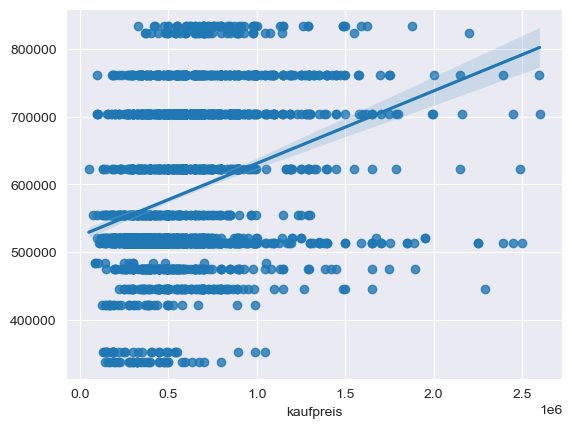

In [126]:
X = df[['einwohner',
       'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen',
       'Inflation']]
Y = df['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

### Whole data set

In [127]:
housing_model = ols("""kaufpreis ~  
                                            + einwohner
                                            + Bevölkerungsdichte
                                            + Arbeitslosenquote
                                            + BIP_pro_einwohner
                                            + Einkommen
                                            + Inflation""", data=df).fit()

housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())

## Regression Characteristics and Macroeconomic Factors

### Train and test data set

(10550, 23)
(2638, 23)
(10550,)
(2638,)
Intercept:
212083.02243046218
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     422.4
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:46:40   Log-Likelihood:            -1.4599e+05
No. Observations:               10550   AIC:                         2.920e+05
Df Residuals:                   10528   BIC:                         2.922e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------

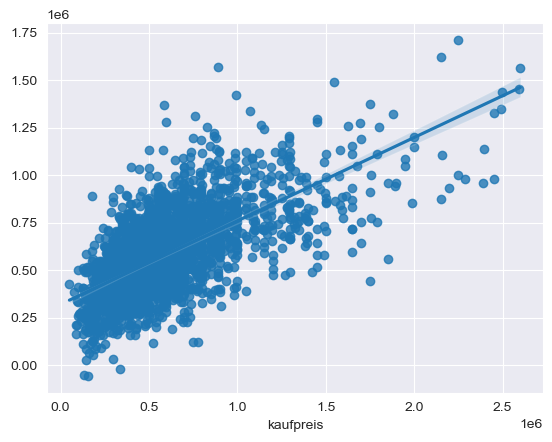

In [128]:
X = df[['wohnflaeche',
       'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer',
       'keller', 'parkplatz', 'age',
       'Objektzustand_Completely_renovated', 'Objektzustand_Dilapidated',
       'Objektzustand_First_occupancy',
       'Objektzustand_First_occupancy_after_reconstruction',
       'Objektzustand_Like_new', 'Objektzustand_Modernised',
       'Objektzustand_Needs_renovation', 'Objektzustand_Reconstructed',
       'Objektzustand_Well_kempt', 'einwohner',
       'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen',
       'Inflation']]
Y = df['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

### Whole data set

In [129]:
housing_model = ols("""kaufpreis ~  wohnflaeche
                                            + grundstuecksflaeche
                                            + zimmeranzahl
                                            + schlafzimmer 
                                            + badezimmer
                                            + parkplatz
                                            + age
                                            + keller
                                            + Objektzustand_Dilapidated
                                            + Objektzustand_Needs_renovation
                                            + Objektzustand_Well_kempt
                                            + Objektzustand_Modernised
                                            + Objektzustand_Reconstructed
                                            + Objektzustand_Completely_renovated
                                            + Objektzustand_Like_new
                                            + Objektzustand_First_occupancy_after_reconstruction
                                            + Objektzustand_First_occupancy
                                            + einwohner
                                            + Bevölkerungsdichte
                                            + Arbeitslosenquote
                                            + BIP_pro_einwohner
                                            + Einkommen
                                            + Inflation""", data=df).fit()

housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())

In [130]:
""" import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

plz_shape_df = gpd.read_file('./Data/PLZ-Gebiete/plz-gebiete.shp', dtype={'plz': str})


plz_region_df = pd.read_csv('./Data/zuordnung_plz_ort.csv', sep=',', dtype={'plz': str})
plz_region_df.drop('osm_id', axis=1, inplace=True)

df_locational_info = pd.merge(left=plz_shape_df, right=plz_region_df, on='plz',how='inner')
df_locational_info.drop(['note'], axis=1, inplace=True)

#Number of inhabitants per plz
#plz_einwohner_df = pd.read_csv('../Data/plz_einwohner.csv', sep=',', dtype={'plz': str, 'einwohner': int})
#germany_plz_einwohner_df = pd.merge(left=germany_df, right=plz_einwohner_df, on='plz', how='left')

plt.rcParams['figure.figsize'] = [16, 11]

top_cities = {
    'Hamburg': (9.993682, 53.551086),
    'Hannover': (9.73322, 52.37052),
    'Bremen': (8.7975, 53.1153),
    'Düsseldorf': (6.782048, 51.227144),
    'Essen': (7.0131, 51.4508),
    'Duisburg': (6.7611, 51.4322),
    'Cologne': (6.953101, 50.935173),
    'Dortmund': (7.468554, 51.513400),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Stuttgart': (9.181332, 48.777128),
    'Munich': (11.576124, 48.137154),
    'Nürnberg': (11.077438, 49.449820),
    'Berlin': (13.404954, 52.520008),
    'Dresden': (13.7400, 51.0500),
    'Leipzig': (12.387772, 51.343479), 
}

df_transactions = df.groupby(['plz'])['plz'].count().reset_index(name='transactions')
germany_number_of_transactions_per_plz_df = pd.merge(left=df_locational_info, right=df_transactions, on='plz', how='left')
print(germany_number_of_transactions_per_plz_df.columns)
total = germany_number_of_transactions_per_plz_df['transactions'].sum()
print(total)

fig, ax = plt.subplots()

germany_number_of_transactions_per_plz_df.plot(ax=ax, column='transactions', categorical=False, legend=True, cmap='autumn_r', alpha=0.8)

for c in top_cities.keys():
    ax.text(
        x=top_cities[c][0],
        y=top_cities[c][1] + 0.08,
        s=c,
        fontsize=12,
        ha='center',
    )

    ax.plot(
        top_cities[c][0],
        top_cities[c][1],
        marker='o',
        c='black',
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of transactions per PLZ',
    aspect=1.3,
    facecolor='lightblue'
)  """

" import geopandas as gpd\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nplt.style.use('seaborn')\n%matplotlib inline\n\nplz_shape_df = gpd.read_file('./Data/PLZ-Gebiete/plz-gebiete.shp', dtype={'plz': str})\n\n\nplz_region_df = pd.read_csv('./Data/zuordnung_plz_ort.csv', sep=',', dtype={'plz': str})\nplz_region_df.drop('osm_id', axis=1, inplace=True)\n\ndf_locational_info = pd.merge(left=plz_shape_df, right=plz_region_df, on='plz',how='inner')\ndf_locational_info.drop(['note'], axis=1, inplace=True)\n\n#Number of inhabitants per plz\n#plz_einwohner_df = pd.read_csv('../Data/plz_einwohner.csv', sep=',', dtype={'plz': str, 'einwohner': int})\n#germany_plz_einwohner_df = pd.merge(left=germany_df, right=plz_einwohner_df, on='plz', how='left')\n\nplt.rcParams['figure.figsize'] = [16, 11]\n\ntop_cities = {\n    'Hamburg': (9.993682, 53.551086),\n    'Hannover': (9.73322, 52.37052),\n    'Bremen': (8.7975, 53.1153),\n    'Düsseldorf': (6.782048, 51.227144),\n    '